# Imports

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from sklearn import datasets
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split , KFold
from sklearn.preprocessing import Normalizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
import numpy as np
import pandas as pd
import itertools
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
import matplotlib.gridspec as gridspec
from mlxtend.plotting import plot_decision_regions
from mlxtend.preprocessing import shuffle_arrays_unison
import seaborn as sns
from tqdm.notebook import tqdm_notebook as tqdm
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# 2. Dataset Exploration:


Mobile Health Human Behavior Analysis     
Human Activity Recognition


[Dataset](https://www.kaggle.com/datasets/gaurav2022/mobile-health)


In [17]:
# ACTIVITY SET
# The activity set is listed in the following:
# L1: Standing still (1 min)
# L2: Sitting and relaxing (1 min)
# L3: Lying down (1 min)
# L4: Walking (1 min)
# L5: Climbing stairs (1 min)
# L6: Waist bends forward (20x)
# L7: Frontal elevation of arms (20x)
# L8: Knees bending (crouching) (20x)
# L9: Cycling (1 min)
# L10: Jogging (1 min)
# L11: Running (1 min)
# L12: Jump front & back (20x)

In [18]:
df = pd.read_csv('/content/mhealth_raw_data.csv')
df

,alx,aly,alz,glx,gly,glz,arx,ary,arz,grx,gry,grz,Activity,subject
0,2.1849,-9.6967,0.63077,0.103900,-0.84053,-0.68762,-8.6499,-4.5781,0.187760,-0.449020,-1.01030,0.034483,0,subject1
1,2.3876,-9.5080,0.68389,0.085343,-0.83865,-0.68369,-8.6275,-4.3198,0.023595,-0.449020,-1.01030,0.034483,0,subject1
2,2.4086,-9.5674,0.68113,0.085343,-0.83865,-0.68369,-8.5055,-4.2772,0.275720,-0.449020,-1.01030,0.034483,0,subject1
3,2.1814,-9.4301,0.55031,0.085343,-0.83865,-0.68369,-8.6279,-4.3163,0.367520,-0.456860,-1.00820,0.025862,0,subject1
4,2.4173,-9.3889,0.71098,0.085343,-0.83865,-0.68369,-8.7008,-4.1459,0.407290,-0.456860,-1.00820,0.025862,0,subject1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1215740,1.7849,-9.8287,0.29725,-0.341370,-0.90056,-0.61493,-3.7198,-8.9071,0.294230,0.041176,-0.99384,-0.480600,0,subject10
1215741,1.8687,-9.8766,0.46236,-0.341370,-0.90056,-0.61493,-3.7160,-8.7455,0.448140,0.041176,-0.99384,-0.480600,0,subject10
1215742,1.6928,-9.9290,0.16631,-0.341370,-0.90056,-0.61493,-3.8824,-9.1155,0.450480,0.041176,-0.99384,-0.480600,0,subject10
1215743,1.5279,-9.6306,0.30458,-0.341370,-0.90056,-0.61493,-3.5564,-9.1441,0.594880,0.041176,-0.99384,-0.480600,0,subject10


In [19]:
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)
df

,alx,aly,alz,glx,gly,glz,arx,ary,arz,grx,gry,grz,Activity,subject
0,2.1849,-9.6967,0.63077,0.103900,-0.84053,-0.68762,-8.6499,-4.5781,0.187760,-0.449020,-1.01030,0.034483,0,subject1
1,2.3876,-9.5080,0.68389,0.085343,-0.83865,-0.68369,-8.6275,-4.3198,0.023595,-0.449020,-1.01030,0.034483,0,subject1
2,2.4086,-9.5674,0.68113,0.085343,-0.83865,-0.68369,-8.5055,-4.2772,0.275720,-0.449020,-1.01030,0.034483,0,subject1
3,2.1814,-9.4301,0.55031,0.085343,-0.83865,-0.68369,-8.6279,-4.3163,0.367520,-0.456860,-1.00820,0.025862,0,subject1
4,2.4173,-9.3889,0.71098,0.085343,-0.83865,-0.68369,-8.7008,-4.1459,0.407290,-0.456860,-1.00820,0.025862,0,subject1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1215740,1.7849,-9.8287,0.29725,-0.341370,-0.90056,-0.61493,-3.7198,-8.9071,0.294230,0.041176,-0.99384,-0.480600,0,subject10
1215741,1.8687,-9.8766,0.46236,-0.341370,-0.90056,-0.61493,-3.7160,-8.7455,0.448140,0.041176,-0.99384,-0.480600,0,subject10
1215742,1.6928,-9.9290,0.16631,-0.341370,-0.90056,-0.61493,-3.8824,-9.1155,0.450480,0.041176,-0.99384,-0.480600,0,subject10
1215743,1.5279,-9.6306,0.30458,-0.341370,-0.90056,-0.61493,-3.5564,-9.1441,0.594880,0.041176,-0.99384,-0.480600,0,subject10


In [20]:
df.drop(['subject'], axis=1, inplace=True)
df

,alx,aly,alz,glx,gly,glz,arx,ary,arz,grx,gry,grz,Activity
0,2.1849,-9.6967,0.63077,0.103900,-0.84053,-0.68762,-8.6499,-4.5781,0.187760,-0.449020,-1.01030,0.034483,0
1,2.3876,-9.5080,0.68389,0.085343,-0.83865,-0.68369,-8.6275,-4.3198,0.023595,-0.449020,-1.01030,0.034483,0
2,2.4086,-9.5674,0.68113,0.085343,-0.83865,-0.68369,-8.5055,-4.2772,0.275720,-0.449020,-1.01030,0.034483,0
3,2.1814,-9.4301,0.55031,0.085343,-0.83865,-0.68369,-8.6279,-4.3163,0.367520,-0.456860,-1.00820,0.025862,0
4,2.4173,-9.3889,0.71098,0.085343,-0.83865,-0.68369,-8.7008,-4.1459,0.407290,-0.456860,-1.00820,0.025862,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1215740,1.7849,-9.8287,0.29725,-0.341370,-0.90056,-0.61493,-3.7198,-8.9071,0.294230,0.041176,-0.99384,-0.480600,0
1215741,1.8687,-9.8766,0.46236,-0.341370,-0.90056,-0.61493,-3.7160,-8.7455,0.448140,0.041176,-0.99384,-0.480600,0
1215742,1.6928,-9.9290,0.16631,-0.341370,-0.90056,-0.61493,-3.8824,-9.1155,0.450480,0.041176,-0.99384,-0.480600,0
1215743,1.5279,-9.6306,0.30458,-0.341370,-0.90056,-0.61493,-3.5564,-9.1441,0.594880,0.041176,-0.99384,-0.480600,0


In [21]:
df['Activity'].unique()

array([ 0,  1,  2,  3,  4,  6,  7,  8,  9, 10, 11, 12,  5])

In [22]:
df['Activity'].value_counts()

,count
Activity,
0,872550
1,30720
2,30720
3,30720
4,30720
9,30720
5,30720
11,30720
10,30720


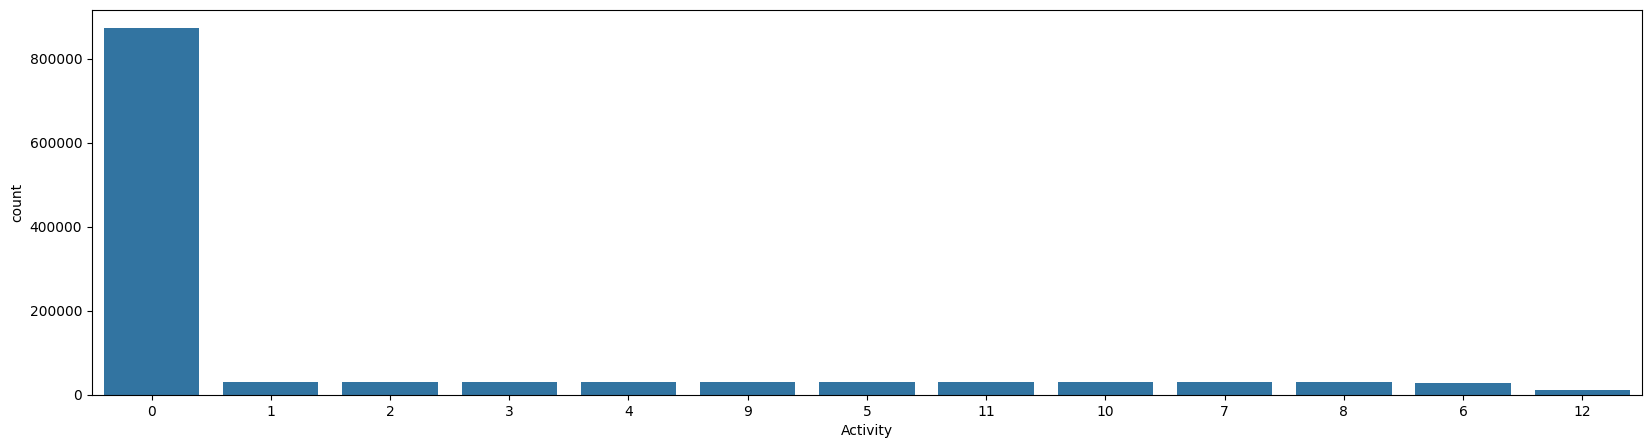

In [23]:
plt.figure(figsize=(20, 5))
sns.countplot(x =df['Activity'],data = df,order=df["Activity"].value_counts().index )
plt.show()

In [24]:
df = df.sample(n=13000)

In [25]:
# Define the number of samples per group
samples_per_group = 1000

# Group by 'activity' and sample from each group
df = df.groupby('Activity').apply(lambda x: x.sample(n=samples_per_group, random_state=42) if len(x) >= samples_per_group else x.sample(n=samples_per_group, replace=True, random_state=42)).reset_index(drop=True)


/tmp/ipython-input-4255983241.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby('Activity').apply(lambda x: x.sample(n=samples_per_group, random_state=42) if len(x) >= samples_per_group else x.sample(n=samples_per_group, replace=True, random_state=42)).reset_index(drop=True)


In [26]:
len(df)

13000

In [27]:
# Print the sample count per activity to verify
print(df['Activity'].value_counts())


Activity
0     1000
1     1000
2     1000
3     1000
4     1000
5     1000
6     1000
7     1000
8     1000
9     1000
10    1000
11    1000
12    1000
Name: count, dtype: int64


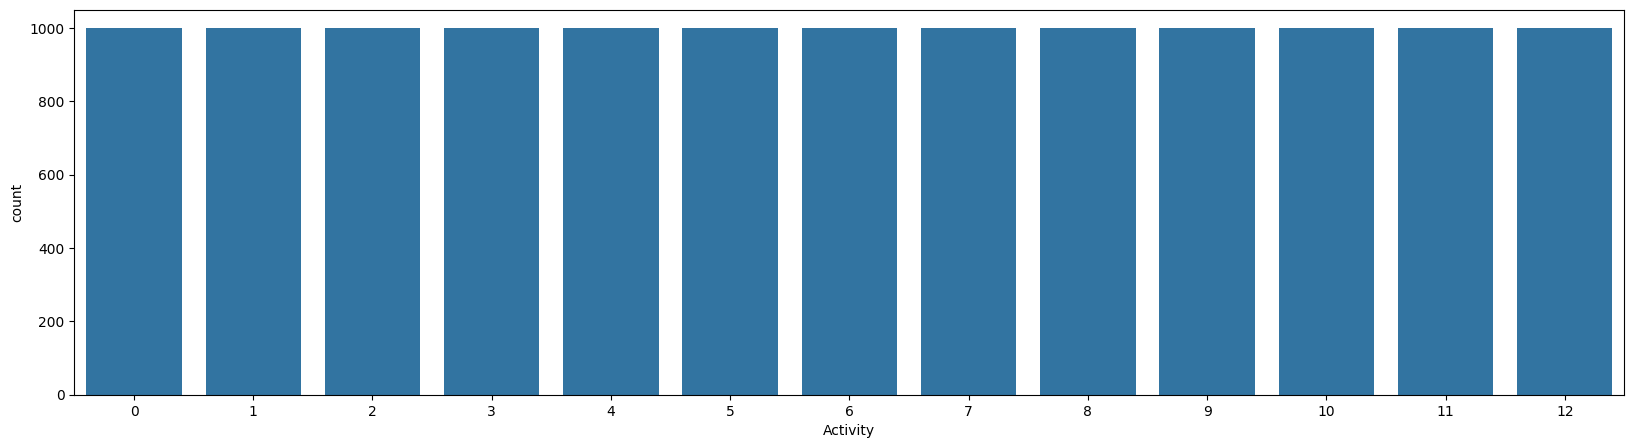

In [28]:
plt.figure(figsize=(20, 5))
sns.countplot(x =df['Activity'],data = df,order=df["Activity"].value_counts().index )
plt.show()

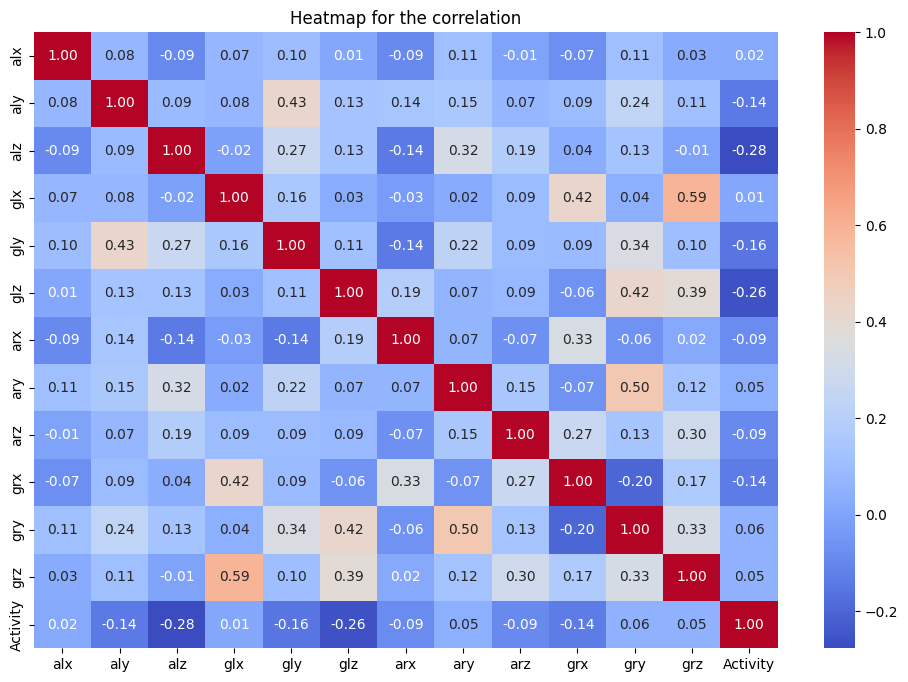

In [29]:
numeric_columns = df.select_dtypes(include=['int', 'float'])

plt.figure(figsize=(12, 8))
sns.heatmap(numeric_columns.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap for the correlation')
plt.show()

In [30]:
'''
df.to_csv('/content/mhealth_raw_data.csv', index=False)
from google.colab import files
files.download('/content/mhealth_raw_data.csv')
'''

"\ndf.to_csv('/content/mhealth_raw_data.csv', index=False)\nfrom google.colab import files\nfiles.download('/content/mhealth_raw_data.csv')\n"

In [31]:
##select all rows and all columns except the last one.
X = df.iloc[:,:-1]

##select all rows, but only the last column.
y = df.iloc[:,-1]

# KNN

In [32]:
#split the data into train and test sets (80,20):
#Shuffle=True, meaning the data will be shuffled before splitting.
from sklearn.model_selection import train_test_split


X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,shuffle=True, random_state=0)

# Normalize the feature data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [33]:
# Create KNN classifier
knn = KNeighborsClassifier(n_neighbors=3)

# Train the model
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [34]:
from sklearn.metrics import classification_report

# Predict on test data
y_pred_knn = knn.predict(X_test)

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred_knn))

Accuracy: 0.9373076923076923


In [35]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_neighbors': [1, 3, 5, 7, 9, 11]
}

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print best parameters and best score
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

Best parameters: {'n_neighbors': 1}
Best score: 0.9510576923076923


In [36]:
precision_knn = precision_score(y_test, y_pred_knn, average='weighted')
recall_knn = recall_score(y_test, y_pred_knn, average='weighted')
f1_knn = f1_score(y_test, y_pred_knn, average='weighted')
accuracy_knn = accuracy_score(y_test, y_pred_knn)

print("Accuracy:", accuracy_knn)
print("Precision:", precision_knn)
print("Recall:", recall_knn)
print("F1 Score:", f1_knn)

Accuracy: 0.9373076923076923
Precision: 0.9332590969719593
Recall: 0.9373076923076923
F1 Score: 0.9314495787304029


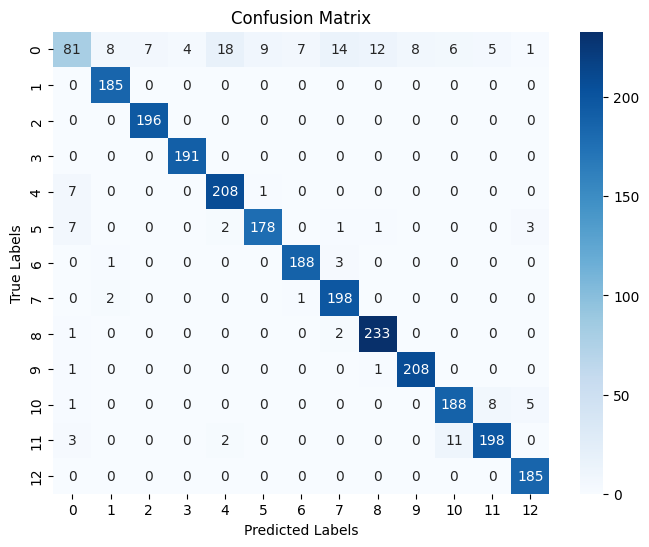

In [37]:
# Confusion matrix
cm_knn = confusion_matrix(y_test, y_pred_knn)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_knn, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Logistic Regression

In [38]:
# Initialize and train logistic regression model
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [39]:
# Make predictions
y_pred_log = logreg.predict(X_test)

In [40]:
# Evaluate the model
print("\nClassification Report:")
print(classification_report(y_test, y_pred_log))


Classification Report:
              precision    recall  f1-score   support

           0       0.09      0.06      0.07       180
           1       0.53      0.72      0.61       185
           2       0.53      0.58      0.55       196
           3       0.95      1.00      0.98       191
           4       0.49      0.47      0.48       216
           5       0.34      0.25      0.29       192
           6       0.46      0.71      0.56       192
           7       0.69      0.61      0.65       201
           8       0.51      0.47      0.49       236
           9       0.90      0.93      0.92       210
          10       0.63      0.61      0.62       202
          11       0.58      0.61      0.59       214
          12       0.36      0.26      0.30       185

    accuracy                           0.56      2600
   macro avg       0.54      0.56      0.55      2600
weighted avg       0.55      0.56      0.55      2600



In [41]:
accuracy_log = accuracy_score(y_test, y_pred_log)
precision_log = precision_score(y_test, y_pred_log, average='weighted')
recall_log = recall_score(y_test, y_pred_log, average='weighted')
f1_log = f1_score(y_test, y_pred_log, average='weighted')

In [42]:
print("accuracy: ",accuracy_log)
print("precision: ",precision_log)
print("recall: ",recall_log)
print("f1: ",f1_log)

accuracy:  0.5646153846153846
precision:  0.548532330171487
recall:  0.5646153846153846
f1:  0.5519052669420209


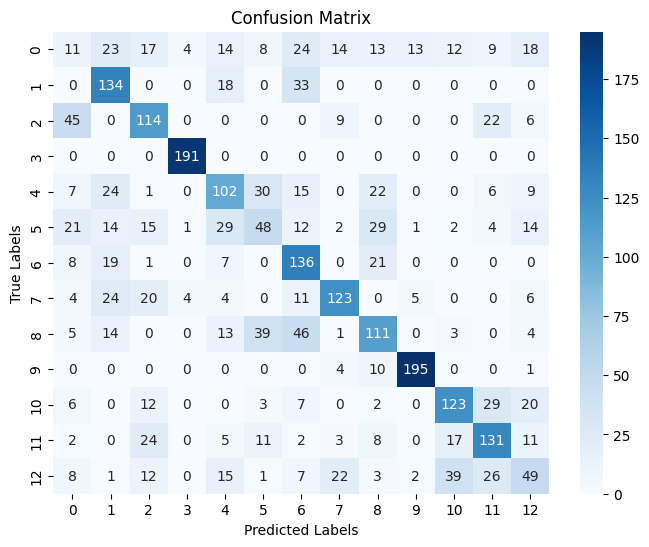

In [43]:
# Confusion matrix

cm_logistic = confusion_matrix(y_test, y_pred_log)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_logistic, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

#SVM

In [44]:
#split the data into train and test sets (80,20):
#Shuffle=True, meaning the data will be shuffled before splitting.
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,shuffle=True, random_state=0)

In [45]:
# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [46]:
# Create SVM classifier with RBF kernel
svm_model = SVC(C=20, kernel='rbf', gamma=0.1)

# Train the model
svm_model.fit(X_train, y_train)

SVC(C=20, gamma=0.1)

In [47]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Predict the response for the test dataset
y_pred_svm = svm_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_svm)
print("Accuracy:", accuracy)

Accuracy: 0.9534615384615385


In [48]:
accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm, average='weighted')
recall_svm = recall_score(y_test, y_pred_svm, average='weighted')
f1_svm = f1_score(y_test, y_pred_svm, average='weighted')

print("Accuracy: ", accuracy_svm)
print("Precision: ", precision_svm)
print("Recall: ", recall_svm)
print("F1 Score: ", f1_svm)

Accuracy:  0.9534615384615385
Precision:  0.952194503524764
Recall:  0.9534615384615385
F1 Score:  0.9504889634915286


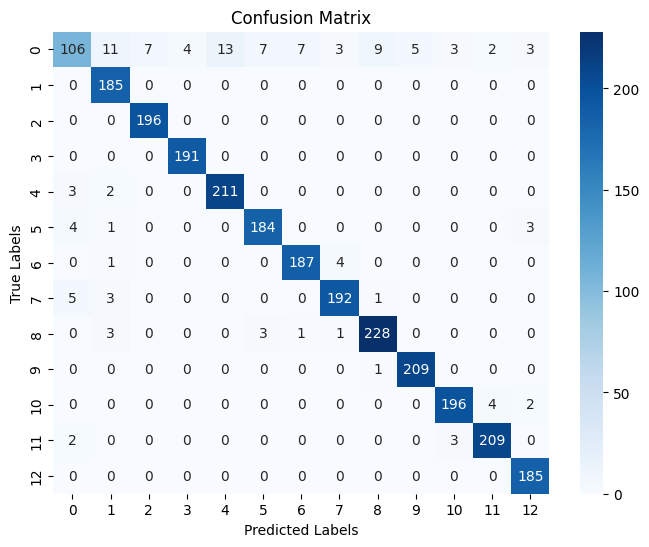

In [49]:
# Confusion matrix

cm_svm = confusion_matrix(y_test, y_pred_svm)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_svm, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Random Forest

In [50]:
# Initialize the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [51]:
# Predict on the test data
y_pred_rf = rf_model.predict(X_test)

In [52]:
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, average='weighted')
recall_rf = recall_score(y_test, y_pred_rf, average='weighted')
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')

print(f"Random Forest Accuracy: {accuracy_rf:.4f}")
print(f"Random Forest Precision: {precision_rf:.4f}")
print(f"Random Forest Recall: {recall_rf:.4f}")
print(f"Random Forest F1-Score: {f1_rf:.4f}")

Random Forest Accuracy: 0.9665
Random Forest Precision: 0.9661
Random Forest Recall: 0.9665
Random Forest F1-Score: 0.9640


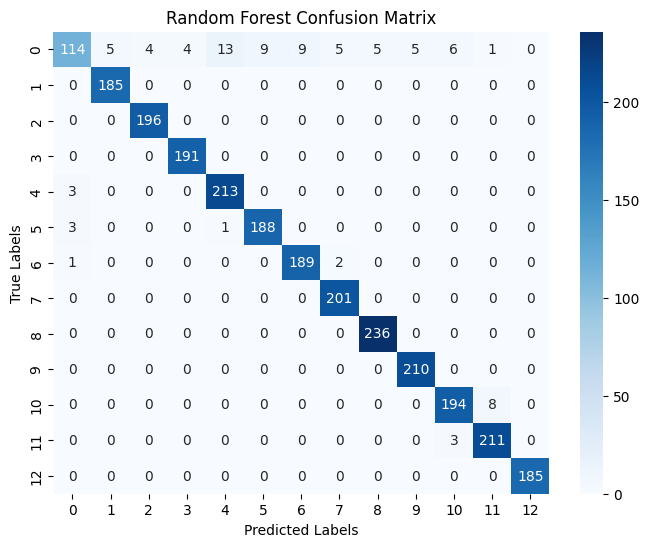

In [53]:
# Confusion Matrix for Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, cmap='Blues', fmt='d', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Random Forest Confusion Matrix')
plt.show()

# Decision Tree

In [54]:
# Initialize and train the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [55]:
# Predict on the test data
y_pred_dt = dt_model.predict(X_test)

In [56]:
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt, average='weighted')
recall_dt = recall_score(y_test, y_pred_dt, average='weighted')
f1_dt = f1_score(y_test, y_pred_dt, average='weighted')

print(f"Decision Tree Accuracy: {accuracy_dt:.4f}")
print(f"Decision Tree Precision: {precision_dt:.4f}")
print(f"Decision Tree Recall: {recall_dt:.4f}")
print(f"Decision Tree F1-Score: {f1_dt:.4f}")

Decision Tree Accuracy: 0.9496
Decision Tree Precision: 0.9473
Decision Tree Recall: 0.9496
Decision Tree F1-Score: 0.9460


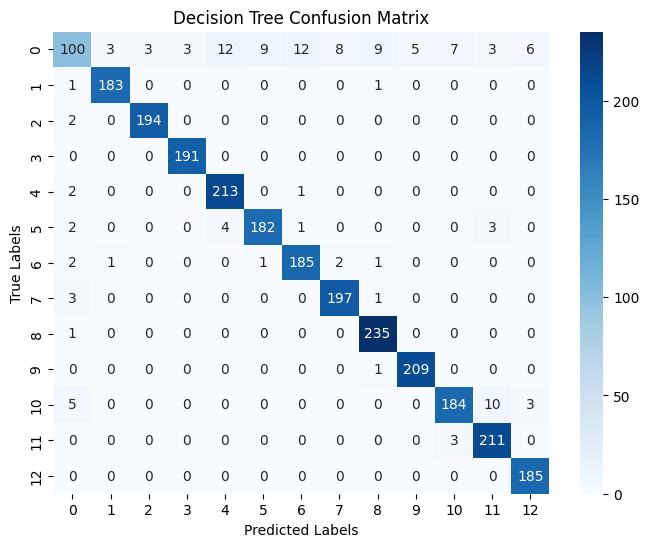

In [57]:
# Confusion Matrix for Decision Tree
cm_dt = confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_dt, annot=True, cmap='Blues', fmt='d', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Decision Tree Confusion Matrix')
plt.show()

# Naiive Bayes


In [58]:
gnb_model = GaussianNB()
gnb_model.fit(X_train, y_train)

GaussianNB()

In [59]:
y_pred_gnb = gnb_model.predict(X_test)

In [60]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

accuracy_gnb = accuracy_score(y_test, y_pred_gnb)
precision_gnb = precision_score(y_test, y_pred_gnb, average='weighted')
recall_gnb = recall_score(y_test, y_pred_gnb, average='weighted')
f1_gnb = f1_score(y_test, y_pred_gnb, average='weighted')

print(f"Naive Bayes Accuracy: {accuracy_gnb:.4f}")
print(f"Naive Bayes Precision: {precision_gnb:.4f}")
print(f"Naive Bayes Recall: {recall_gnb:.4f}")
print(f"Naive Bayes F1-Score: {f1_gnb:.4f}")

Naive Bayes Accuracy: 0.6569
Naive Bayes Precision: 0.6510
Naive Bayes Recall: 0.6569
Naive Bayes F1-Score: 0.6410


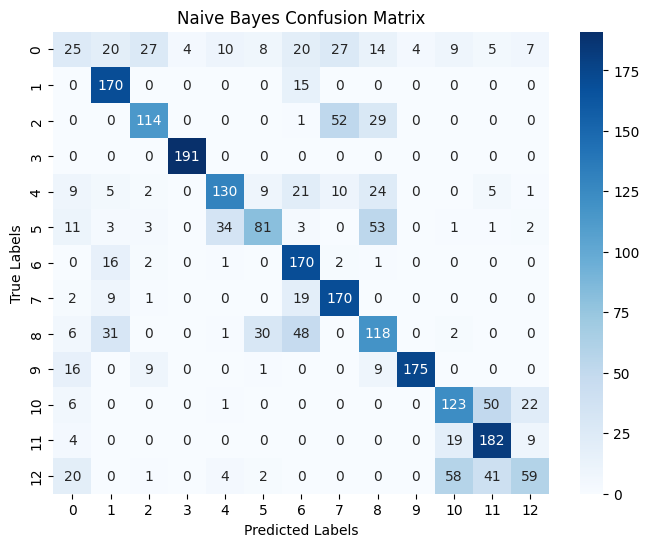

In [61]:
cm_gnb = confusion_matrix(y_test, y_pred_gnb)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_gnb, annot=True, cmap='Blues', fmt='d', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Naive Bayes Confusion Matrix')
plt.show()

# Bagging

In [62]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [63]:
# Step 3: Initialize a Decision Tree Classifier
dtree = DecisionTreeClassifier()

In [64]:
# Step 4: Create a BaggingClassifier using the Decision Tree as the base estimator
bagging_clf = BaggingClassifier(estimator=dtree, n_estimators=50, random_state=42)

In [65]:
# Step 5: Train the BaggingClassifier on the training data
bagging_clf.fit(X_train, y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=50,
                  random_state=42)

In [66]:
# Step 6: Make predictions on the test data
y_pred = bagging_clf.predict(X_test)

In [67]:
# Evaluate the model
accuracy_bagging = accuracy_score(y_test, y_pred)
precision_bagging = precision_score(y_test, y_pred, average='weighted')
recall_bagging = recall_score(y_test, y_pred, average='weighted')
f1_bagging = f1_score(y_test, y_pred, average='weighted')

print(f"Bagging Accuracy: {accuracy_bagging:.4f}")
print(f"Bagging Precision: {precision_bagging:.4f}")
print(f"Bagging Recall: {recall_bagging:.4f}")
print(f"Bagging F1-Score: {f1_bagging:.4f}")

Bagging Accuracy: 0.9581
Bagging Precision: 0.9578
Bagging Recall: 0.9581
Bagging F1-Score: 0.9545


In [68]:
# Step 8: Feature Importance from one Decision Tree in the Bagging Classifier (You can't use bagging_clf directly)
dtree_fitted = bagging_clf.estimators_[0]  # Access the first fitted DecisionTree from the bagging ensemble
feature_importances = dtree_fitted.feature_importances_

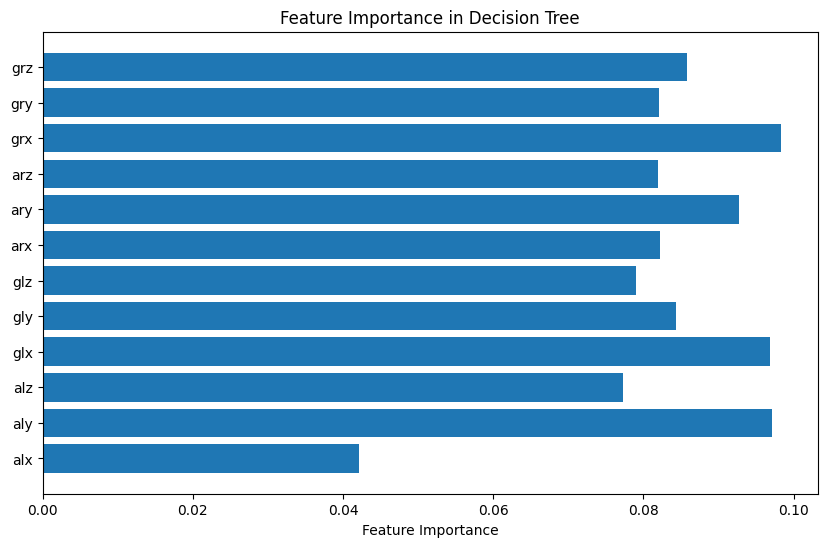

In [69]:
# Step 9: Visualize feature importance (for Decision Tree)
features = df.columns[:-1]  # Get feature names from DataFrame columns (excluding the target)
plt.figure(figsize=(10, 6))
plt.barh(features, feature_importances)
plt.xlabel('Feature Importance')
plt.title('Feature Importance in Decision Tree')
plt.show()

# Boosting

In [70]:
# Initialize the XGBoost classifier
xgb_clf = XGBClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

In [71]:
# Train the XGBoost model
xgb_clf.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, ...)

In [72]:
# Predict on the test set
y_pred_xgb = xgb_clf.predict(X_test)

In [73]:
# Evaluate the model
accuracy_Boosting = accuracy_score(y_test, y_pred_xgb)
precision_Boosting = precision_score(y_test, y_pred_xgb, average='weighted')
recall_Boosting = recall_score(y_test, y_pred_xgb, average='weighted')
f1_Boosting = f1_score(y_test, y_pred_xgb, average='weighted')

print(f"Boosting Accuracy: {accuracy_Boosting:.4f}")
print(f"Boosting Precision: {precision_Boosting:.4f}")
print(f"Boosting Recall: {recall_Boosting:.4f}")
print(f"Boosting F1-Score: {f1_Boosting:.4f}")

Boosting Accuracy: 0.9619
Boosting Precision: 0.9612
Boosting Recall: 0.9619
Boosting F1-Score: 0.9591


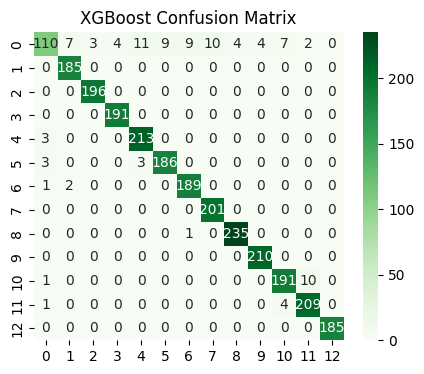

In [74]:
# Plot Confusion Matrix
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_xgb), annot=True, fmt='d', cmap='Greens')
plt.title('XGBoost Confusion Matrix')
plt.show()

# Neural Network

In [75]:
# Convert string labels to numerical labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

In [76]:
# One-hot encode the target labels
y_train_categorical = to_categorical(y_train_encoded)
y_test_categorical = to_categorical(y_test_encoded)

In [77]:
# Create a sequential model
model = Sequential()

model.add(Dense(128, activation='relu', input_dim=X_train.shape[1]))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(y_train_categorical.shape[1], activation='softmax'))

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Print the model summary
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         1,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 13)             │           845 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,765 (42.05 KB)

 Trainable params: 10,765 (42.05 KB)

 Non-trainable params: 0 (0.00 B)

In [78]:
# Train the model
history = model.fit(X_train, y_train_categorical,
                    epochs=50,
                    batch_size=32,
                    validation_data=(X_test, y_test_categorical),
                    verbose=1)

Epoch 1/50
325/325 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.3511 - loss: 1.9755 - val_accuracy: 0.6927 - val_loss: 1.0240
Epoch 2/50
325/325 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6199 - loss: 1.1143 - val_accuracy: 0.7512 - val_loss: 0.7927
Epoch 3/50
325/325 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6903 - loss: 0.9137 - val_accuracy: 0.7777 - val_loss: 0.6968
Epoch 4/50
325/325 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7192 - loss: 0.8302 - val_accuracy: 0.8085 - val_loss: 0.6122
Epoch 5/50
325/325 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7438 - loss: 0.7769 - val_accuracy: 0.8327 - val_loss: 0.5510
Epoch 6/50
325/325 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7652 - loss: 0.7094 - val_accuracy: 0.8438 - val_loss: 0.5128
Epoch 7/50
325/325 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7886 - loss: 0.6309 - val_accuracy: 0.8473 - val_loss: 0.4809
Epoch 8/50
325/325 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7997 - loss: 0.6039 - val_accuracy: 0.

In [79]:
# Get predictions
y_pred_probs = model.predict(X_test)
y_pred_classes = np.argmax(y_pred_probs, axis=1)
y_true_classes = np.argmax(y_test_categorical, axis=1)

82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


In [80]:
# Evaluate the model on test data
loss, accuracy = model.evaluate(X_test, y_test_categorical, verbose=0)
print(f'Test Accuracy: {accuracy:.4f}')

Test Accuracy: 0.9450


In [81]:
# Evaluate the model
accuracy_nn = accuracy_score(y_true_classes, y_pred_classes)
precision_nn = precision_score(y_true_classes, y_pred_classes, average='weighted')
recall_nn = recall_score(y_true_classes, y_pred_classes, average='weighted')
f1_nn = f1_score(y_true_classes, y_pred_classes, average='weighted')

print(f"nn Accuracy: {accuracy_nn:.4f}")
print(f"nn Precision: {precision_nn:.4f}")
print(f"nn Recall: {recall_nn:.4f}")
print(f"nn F1-Score: {f1_nn:.4f}")

nn Accuracy: 0.9450
nn Precision: 0.9435
nn Recall: 0.9450
nn F1-Score: 0.9404


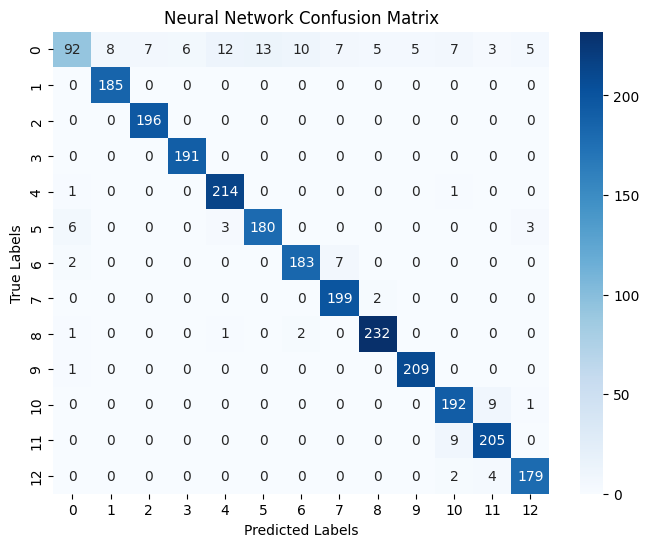

In [82]:
# Generate confusion matrix
cm_nn = confusion_matrix(y_true_classes, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_nn, annot=True, cmap='Blues', fmt='d', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Neural Network Confusion Matrix')
plt.show()

# Comparison

In [86]:
# Collect all model metrics
results = {
    'Model': ['KNN', 'Logistic Regression', 'SVM', 'Random Forest', 'Decision Tree', 'Naive Bayes', 'Bagging (Decision Tree)', 'Boosting (XGBoost)', 'Neural Network'],
    'Accuracy': [accuracy_knn, accuracy_log, accuracy_svm, accuracy_rf, accuracy_dt, accuracy_gnb, accuracy_bagging, accuracy_Boosting, accuracy_nn],
    'Precision': [precision_knn, precision_log, precision_svm, precision_rf, precision_dt, precision_gnb, precision_bagging, precision_Boosting, precision_nn],
    'Recall': [recall_knn, recall_log, recall_svm, recall_rf, recall_dt, recall_gnb, recall_bagging, recall_Boosting, recall_nn],
    'F1-Score': [f1_knn, f1_log, f1_svm, f1_rf, f1_dt, f1_gnb, f1_bagging, f1_Boosting, f1_nn]
}

# Create a DataFrame
results_df = pd.DataFrame(results)

# Sort the DataFrame by accuracy in descending order and reset the index
results_df_sorted = results_df.sort_values(by='Accuracy', ascending=False).reset_index(drop=True)

In [87]:
results_df_sorted

,Model,Accuracy,Precision,Recall,F1-Score
0,Random Forest,0.966538,0.966079,0.966538,0.964049
1,Boosting (XGBoost),0.961923,0.961184,0.961923,0.959138
2,Bagging (Decision Tree),0.958077,0.957838,0.958077,0.954537
3,SVM,0.953462,0.952195,0.953462,0.950489
4,Decision Tree,0.949615,0.947301,0.949615,0.946044
5,Neural Network,0.945000,0.943534,0.945000,0.940382
6,KNN,0.937308,0.933259,0.937308,0.931450
7,Naive Bayes,0.656923,0.651017,0.656923,0.641031
8,Logistic Regression,0.564615,0.548532,0.564615,0.551905


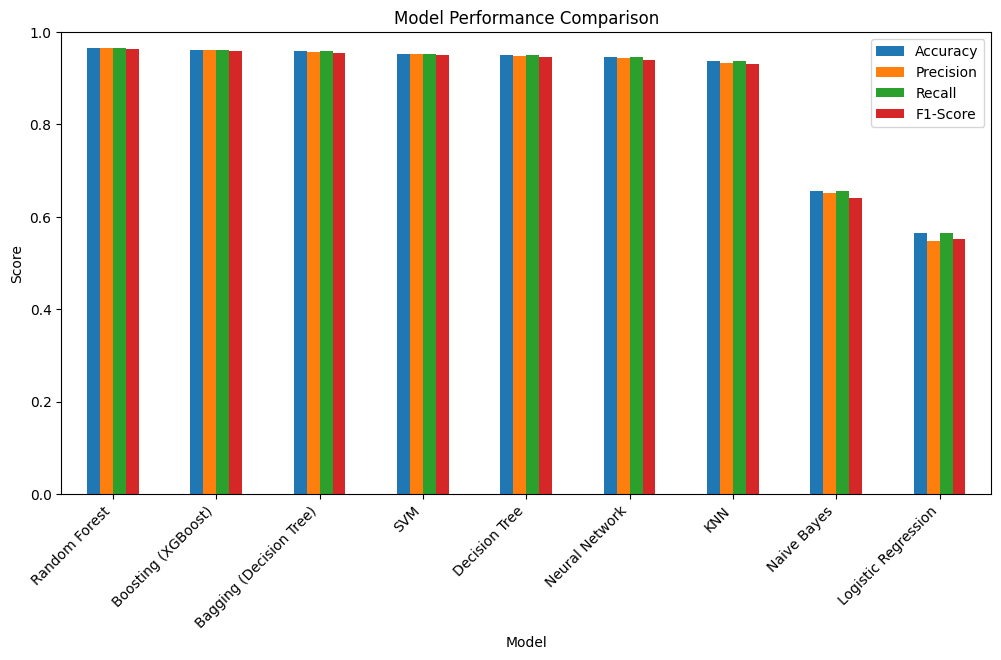

In [88]:
# Plotting the comparison
results_df_sorted.set_index('Model').plot(kind='bar', figsize=(12, 6))
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.ylim(0, 1.0)
plt.xticks(rotation=45, ha='right')
plt.show()